*Python Executables*

In [52]:
import sys
sys.executable

'/Library/Frameworks/Python.framework/Versions/3.6/bin/python3'

# K Nearest Neighbour

In [91]:
import pandas as pd
import numpy as np
import random
import math
from vega3 import VegaLite

## Prepare data

We will write our logic to create custom dataset

In [198]:
def gen_points(val_seed_xy=(80, 100), num_class=2, num_points=100, global_std=20):
    # cluster center
    centers = []
    for i in range(num_class):
        centers.append((val_seed_xy[0] * random.random(), val_seed_xy[1] * random.random()))
    
    # Points near centers
    X = np.empty(shape=[0, 2])
    y = np.empty(shape=[0, 1])
    for i in range(num_points):
        cls = num_class * random.random()
        cls = math.floor(cls)
        xcord = centers[cls][0] + global_std * random.random()
        ycord = centers[cls][1] + global_std * random.random()
        X = np.append(X, [[xcord, ycord]], axis=0)
        y = np.append(y, [[cls]], axis=0)
    
    return (X, y)

Here we have our own clusters of point. Now visualize it to check if the data which has been generated is according yo our expectation or not.

In [199]:
(X, y) = gen_points()

Now that we have our data ready, lets make a dataframe so that we can visualize it

In [200]:
columns = ["x", "y", "c"]
mat = np.hstack((X, y))
df = pd.DataFrame(mat, columns=columns)
df.head()

,x,y,c
0,79.447113,44.842280,1.0
1,80.120575,57.233437,1.0
2,21.027631,106.482419,0.0
3,86.227512,49.016525,1.0
4,26.429331,107.285408,0.0


Now lets visualize it

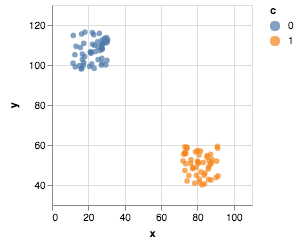

In [203]:
VegaLite({
    "mark": { "type": "point", "filled": "true" },
    "encoding": {
        "y": { 
            "type": "quantitative",
            "field": "y",
            "scale": { 
                "domain": [df['y'].min() - 10, df['y'].max() + 10]
            } 
        },
        "x": { 
            "type": "quantitative", 
            "field": "x", 
            "scale": { 
                "domain": [df['x'].min() - 10, df['x'].max() + 10]
            } 
        },
        "color": { "type": "nominal", "field": "c" }
    }
}, df)

Looks like we can apply clear classification with this dataset.

## Algorithm